In [1]:
%matplotlib inline

In [2]:
import logging
from datetime import datetime, timedelta
from pprint import pformat
import matplotlib.pyplot as plt

In [3]:
from geophys_point_fetcher import GeophysPointFetcher
logging.getLogger('geophys_point_fetcher').setLevel(logging.DEBUG)

In [4]:
def JW_metadata_filter(metadata_dict):
    '''
    Example function to filter datasets based on metadata values in metadata_dict
    This version applies John Wilford's filter conditions
    Returns True for match, False otherwise
    '''
    try:
        # Reject any datasets earlier than 1981
        if datetime.strptime(metadata_dict['acquisition_start_date'], '%d/%m/%Y') < datetime.strptime('01/01/1981', '%d/%m/%Y'):
            return False
            
        # Only accept GA/BMR/AGSO datasets between 1981 and 1992
        if (datetime.strptime(metadata_dict['acquisition_start_date'], '%d/%m/%Y') < datetime.strptime('01/01/1992', '%d/%m/%Y')
            and metadata_dict['client'] not in ['Geoscience Australia',
                                                'BMR',
                                                'AGSO',
                                                'GA'
                                                ]
            ):
                return False
    except ValueError:
        logger.warning('WARNING: Unhandled date format: {}'.format(metadata_dict['acquisition_start_date']))
        return False 
    
    return True        

In [5]:
# Instantiate GeophysPointFetcher
gpf = GeophysPointFetcher()

Importing metadata CSV file geophysics_line_nc_metadata.csv


In [6]:
# Set search parameters
bounding_box=(120.0, -29.0, 121, -28) # Bounding box coordinates in form "[<min_xord>,<min_yord>,<max_xord>,<max_yord>]"
keywords = ['geophysics', 'TMI'] # Keywords to match
variable_names = ['mag_awags'] # Variables to read
flight_lines_only=True

Opening http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/awags_survey_reformat/netcdf/P1152MAG.nc
Excluding tie-lines
Computing spatial subset mask
15628 points found in bounding box (120.0, -29.0, 121, -28) for http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/awags_survey_reformat/netcdf/P1152MAG.nc
	Reading coordinates
	Reading values for mag_awags
Opening http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_adjusted/netcdf/P586MAG.nc
Excluding tie-lines
Computing spatial subset mask
2526806 points found in bounding box (120.0, -29.0, 121, -28) for http://dapds00.nci.org.au/thredds/dodsC/uc0/rr2_dev/rcb547/AWAGS_Levelled_Line_Databases/mag_database_reformat_adjusted/netcdf/P586MAG.nc
	Reading coordinates
	Reading values for mag_awags
Elapsed time: 0:01:09.253000


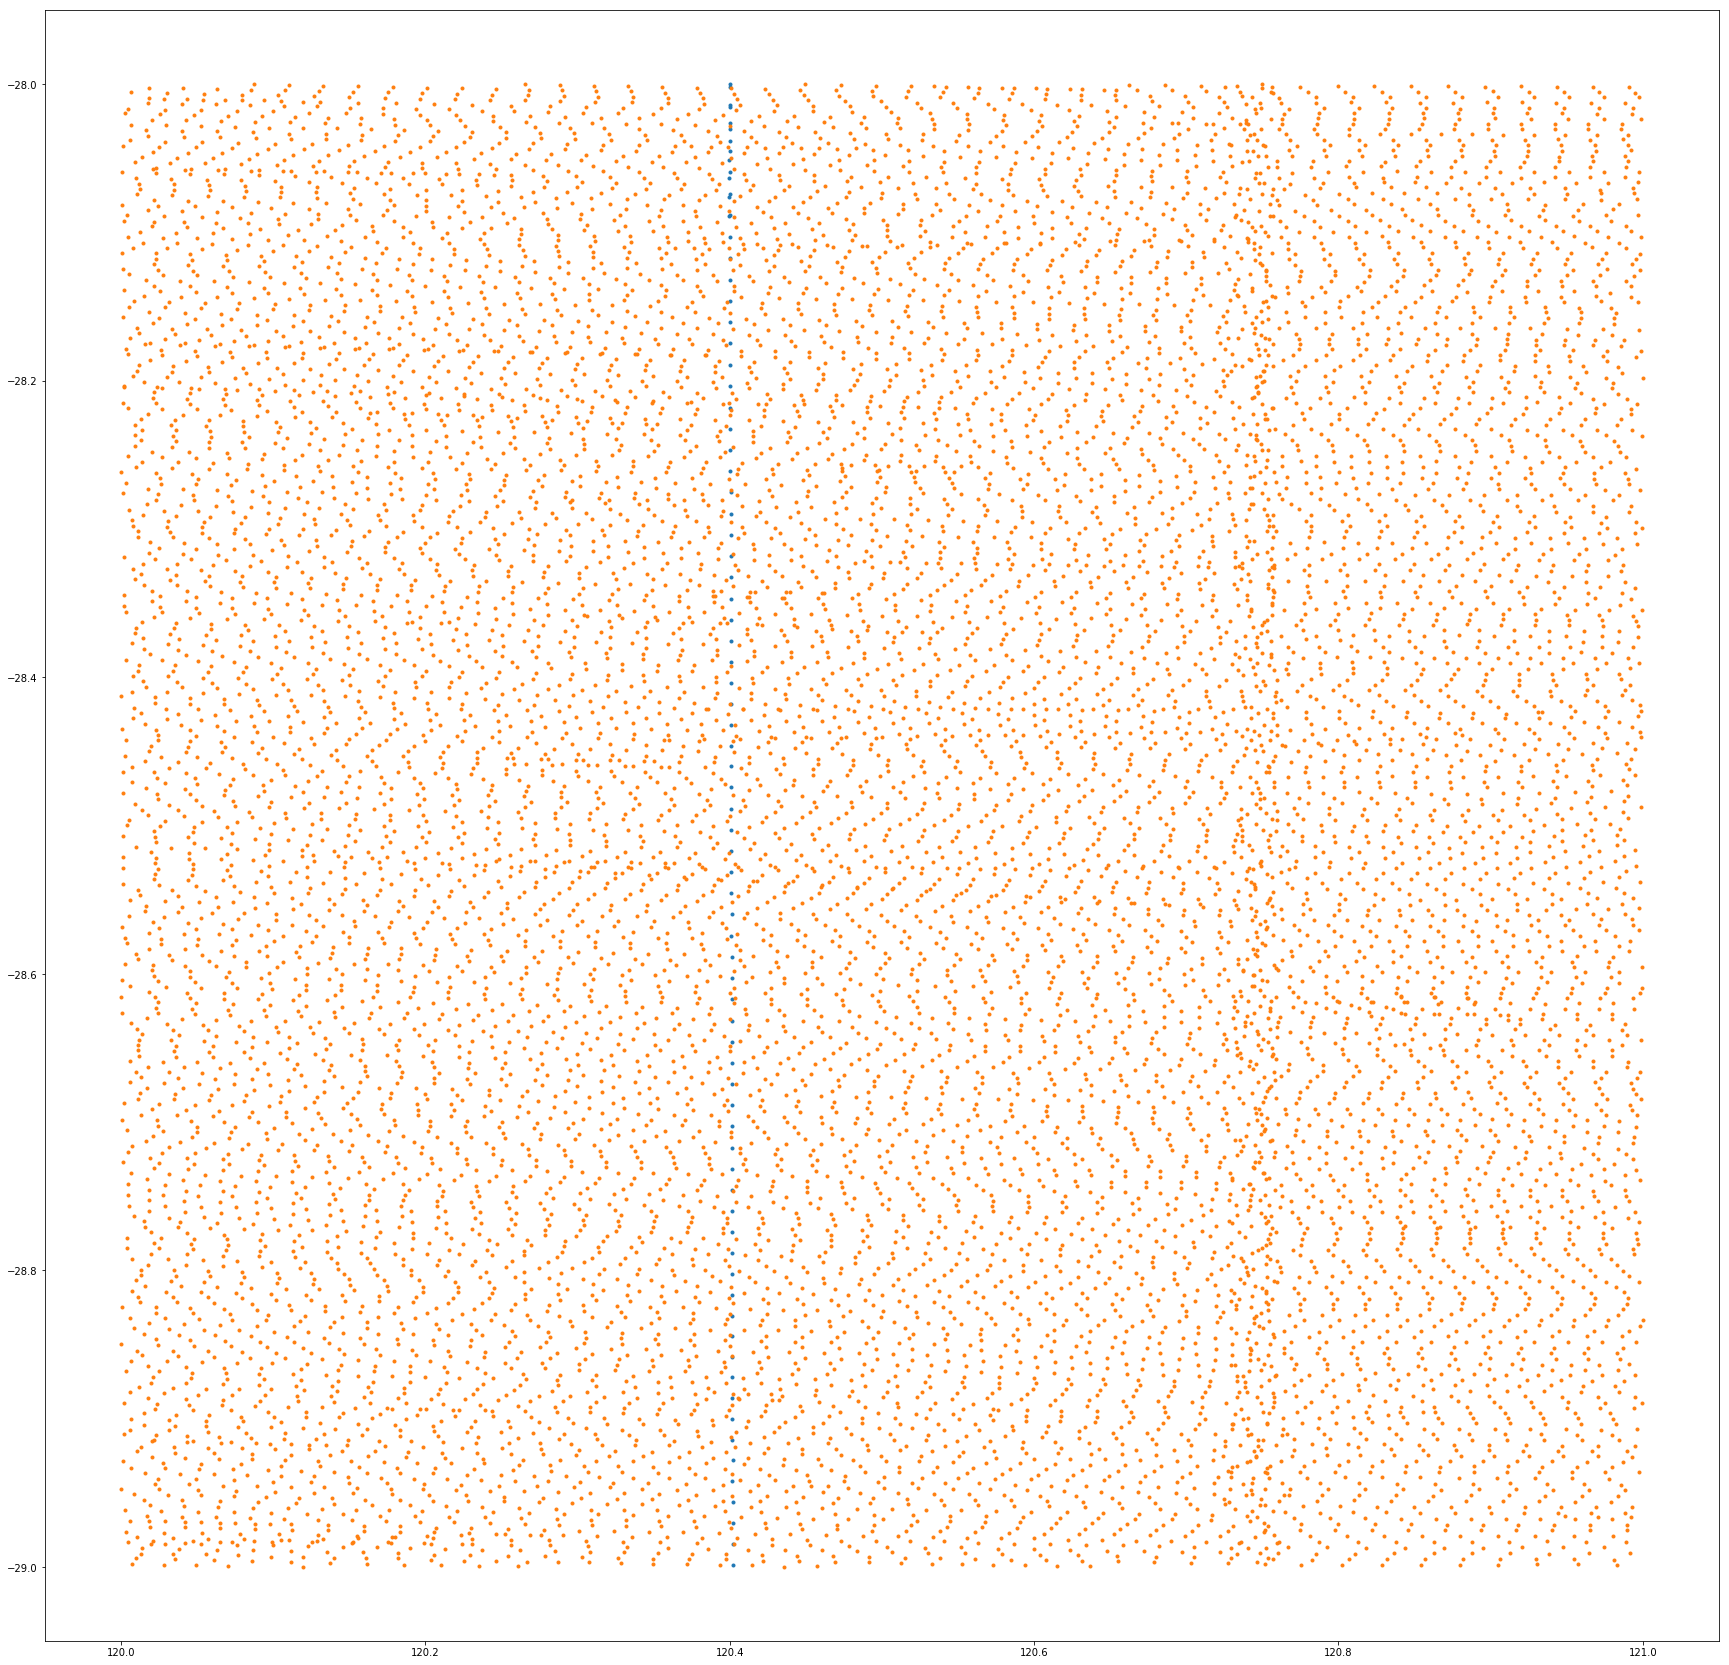

In [7]:
# Plot data points
plt.figure(figsize=(30,30))

point_step = 200 # Step between points in plots: 1=plot every point, 2=plot every second point, etc.

# Find all nearest points using above parameters
for dataset_dict in gpf.point_data_generator(bounding_box=bounding_box,
                                             keywords=keywords,
                                             metadata_filter_function=JW_metadata_filter,
                                             variable_names=variable_names,
                                             flight_lines_only=flight_lines_only
                                             ):
    
    #print(pformat(dataset_dict))
    coordinates = dataset_dict['coordinates']
    # Only show one in every point_step points
    plt.plot(coordinates[:,0][0:-1:point_step], coordinates[:,1][0:-1:point_step], '.')        
